# A JAX FRAMEWORK FOR MULTI-AGENT RESEARCH IN DECENTRALISED ENERGY MARKETS

***Author: K. Emerson*** \
***Department of Computer Science*** \
***Faculty of Sciences and Bioengineering Sciences*** \
***Vrije Universiteit Brussel***

---

notebook used for plotting the mean rewards of all agents for all runs. plots used in the chapter: Experimental results

In [1]:
import os
import sys
from typing import Tuple, Optional
import matplotlib.pyplot as plt
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.chdir(module_path)
sys.path.insert(0,'/workspaces/Thesis_MARL_in_Decentralised_Energy_Networks/code/')
sys.path.insert(0,'/workspaces/Thesis_MARL_in_Decentralised_Energy_Networks/code/src')

import notebooks.experiment_analysis_helpers as eah
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', 0)

SAVE_PLOTS = True
PLOTFORMAT = "pdf"
PLOT_FOLDER = "/workspaces/Thesis_MARL_in_Decentralised_Energy_Networks/code/notebooks/experiment_plots"
EXPERIMENT_PATH = os.path.join("/workspaces","Thesis_MARL_in_Decentralised_Energy_Networks","code","experiment_logs_thesis") 
DATA_SLICER = 5


### No batteries plots

used for experiment 1,2,3,se1

In [80]:
tests=["e1_GM_siFFF_PR_siFFF_BA_0_0_DS_0_0_DA_F",
"e2_GM_siTFF_PR_siFFF_BA_0_0_DS_0_0_DA_F",
"e3_GM_siTTF_PR_siFFF_BA_0_0_DS_0_0_DA_F",
"e4_GM_siFFF_PR_siTFF_BA_0_0_DS_0_0_DA_F",
"e5_GM_SY_PR_SY_BA_0_0_DS_0_0_DA_F",
"e6_GM_siFFF_PR_siFFF_BA_13500_5000_DS_0_0_DA_F",
"e7_GM_siTFF_PR_siFFF_BA_13500_5000_DS_0_0_DA_F",
"e8_GM_siTTF_PR_siFFF_BA_13500_5000_DS_0_0_DA_F",
"e9_GM_siFFF_PR_siTFF_BA_13500_5000_DS_0_0_DA_F",
"e10_GM_SY_PR_SY_BA_13500_5000_DS_0_0_DA_F",

"e12_GM_siTFF_PR_siFFF_BA_13500_5000_DS_0_0_DA_T",
"e13_GM_siTTF_PR_siFFF_BA_13500_5000_DS_0_0_DA_T",
"e14_GM_siFFF_PR_siTFF_BA_13500_5000_DS_0_0_DA_T",
"e15_GM_SY_PR_SY_BA_13500_5000_DS_0_0_DA_T",

"e17_GM_siTFF_PR_siFFF_BA_13500_5000_DS_4_4_DA_T",
"e18_GM_siTTF_PR_siFFF_BA_13500_5000_DS_4_4_DA_T",
"e19_GM_siFFF_PR_siTFF_BA_13500_5000_DS_4_4_DA_T",
"e20_GM_SY_PR_SY_BA_13500_5000_DS_4_4_DA_T"]

In [149]:
EXPERIMENT = "e7_GM_siTFF_PR_siFFF_BA_13500_5000_DS_0_0_DA_F_selfplay"
all_runs_df = eah.load_all_runs(experiment_path=os.path.join(EXPERIMENT_PATH,EXPERIMENT))
runs_df = all_runs_df[0]

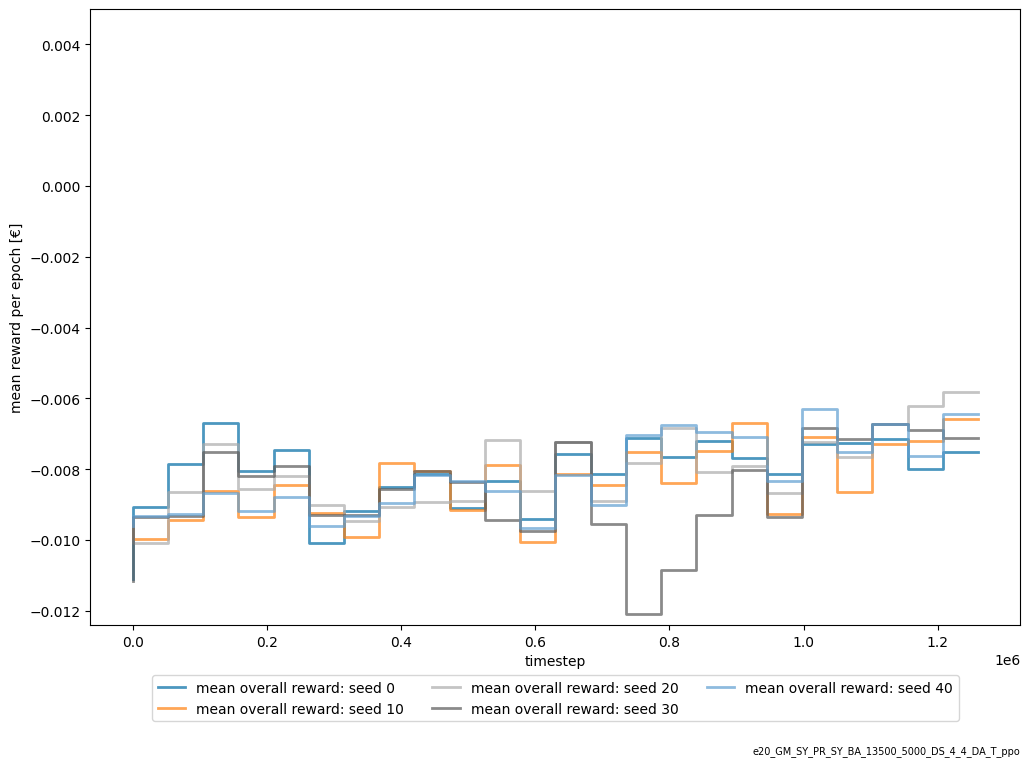

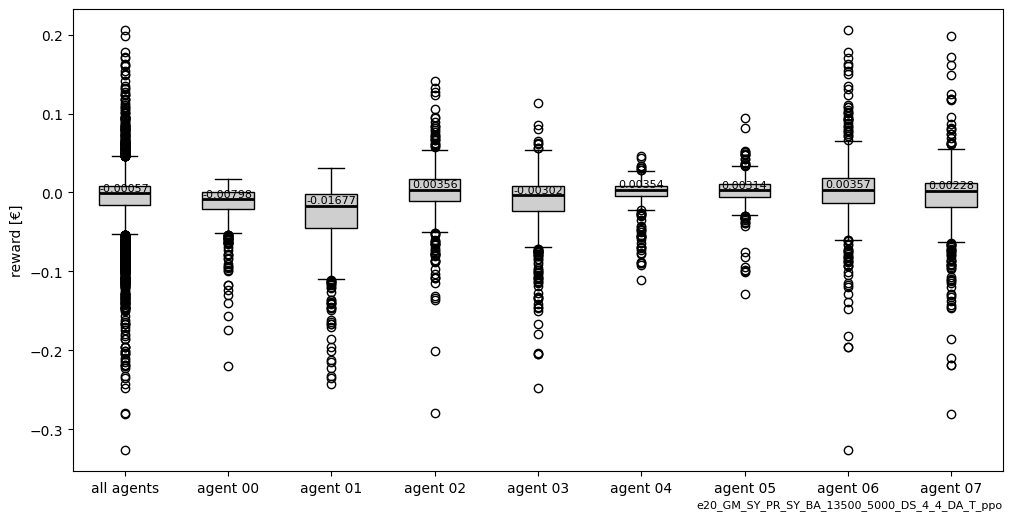

In [82]:
eah.plot_mean_returns_per_epoch_all_seeds(all_runs_df,EXPERIMENT,save=SAVE_PLOTS, fileformat=PLOTFORMAT,plot_path=PLOT_FOLDER,figsize=(12,8))
eah.plot_last_epoch_boxplot(runs_df,EXPERIMENT,SAVE_PLOTS,PLOT_FOLDER,PLOTFORMAT,figsize=(12,6))

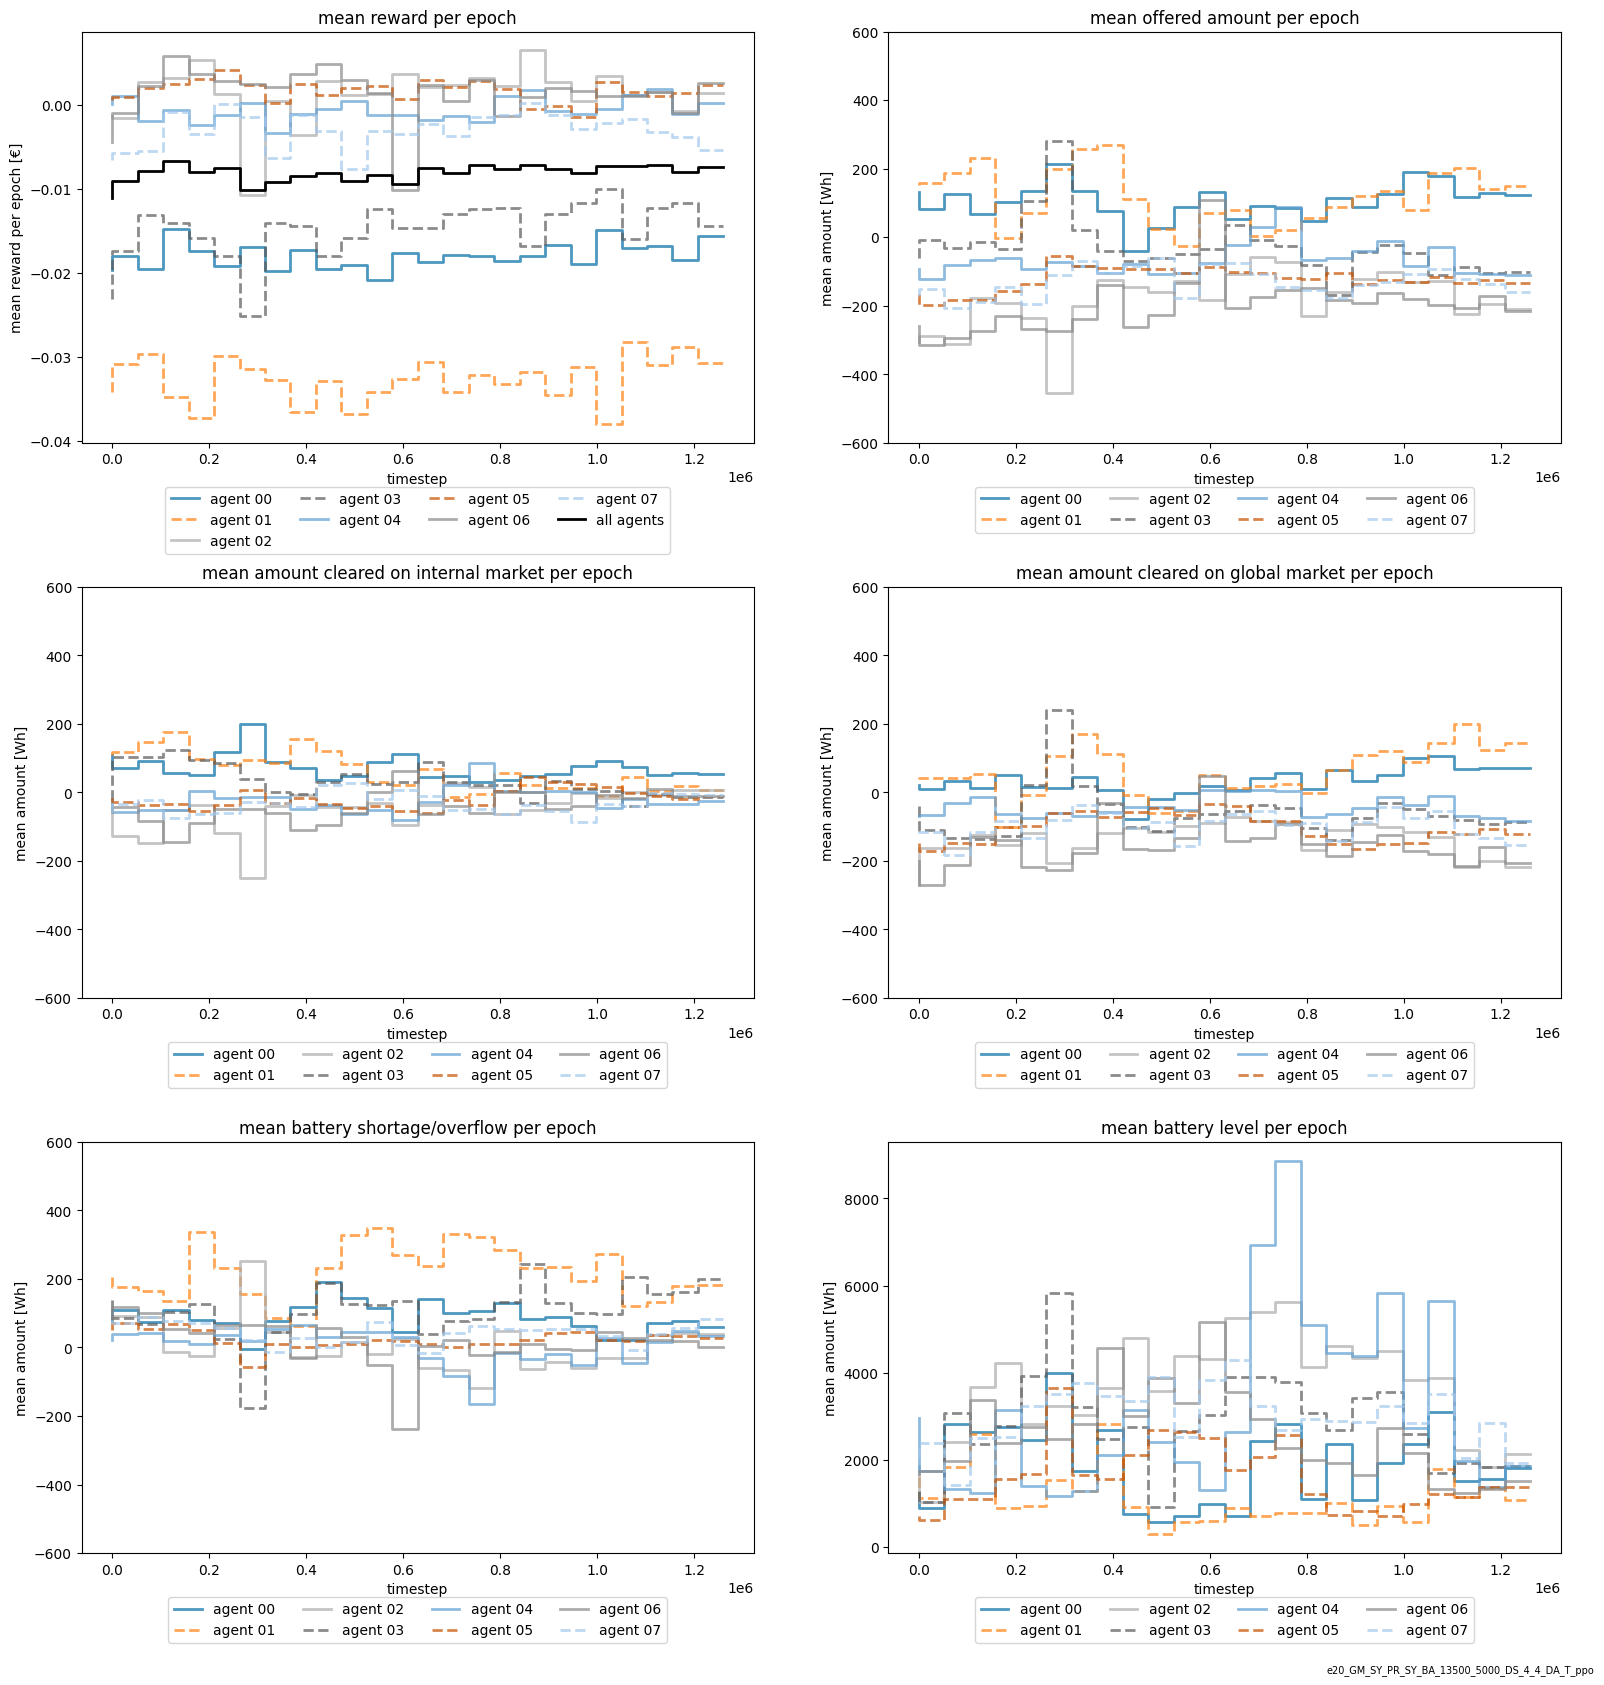

In [83]:
def plot_run_overview_with_batt(
        runs_df:pd.DataFrame,
        plotformat:str,
        experiment:str,
        x_limit:Tuple[int,Optional[int]],
        amounts_limit:Optional[Tuple[float,float]],
        battery_limit:Optional[Tuple[float,float]],
        rewards_limit:Optional[Tuple[float,float]]):
    
    fig, ax = plt.subplots(3,2,figsize=(17, 17))
    
    eah.plot_mean_epoch_returns_per_agent(runs_df,ax = ax[0][0],sample_min=x_limit[0],sample_max=x_limit[1],y_limit=rewards_limit)
    eah.plot_mean_energy_amount_offered_per_agent(runs_df,ax = ax[0][1],sample_min=x_limit[0],sample_max=x_limit[1],y_limit=amounts_limit)

    eah.plot_mean_amount_internally_cleared_per_agent(runs_df,ax = ax[1][0],sample_min=x_limit[0],sample_max=x_limit[1],y_limit=amounts_limit)
    eah.plot_mean_amount_global_cleared_per_agent(runs_df,ax = ax[1][1],sample_min=x_limit[0],sample_max=x_limit[1],y_limit=amounts_limit)
    
    eah.plot_mean_batt_discrepancy_amount_per_agent(runs_df,ax = ax[2][0],sample_min=x_limit[0],sample_max=x_limit[1],y_limit=amounts_limit)
    eah.plot_mean_battery_per_agent(runs_df,ax = ax[2][1],sample_min=x_limit[0],sample_max=x_limit[1],y_limit=battery_limit)
    
         
    plt.subplots_adjust(left=0.06, bottom=0.09, right=0.93 , top=0.985, wspace=0.2, hspace=0.35)
    fig.text(0.95, 0.02, experiment, ha='right', fontsize=7)
    #plt.subplots_adjust(bottom=0.1, wspace=0.2, hspace=0.4) 
 
    if SAVE_PLOTS:
        plt.savefig(os.path.join(PLOT_FOLDER,f"{experiment}_overview.{plotformat}"),format=plotformat)
        

amounts_limit = (-600, 600)
battery_limit = (0,13500)
rewards_limit = (-0.00005,0.00015)

#amounts_limit = None
battery_limit = None
rewards_limit = None

plot_run_overview_with_batt(
        runs_df,
        PLOTFORMAT,
        EXPERIMENT,
        x_limit=(0,None),
        amounts_limit=amounts_limit,
        battery_limit=battery_limit,
        rewards_limit=rewards_limit
        )


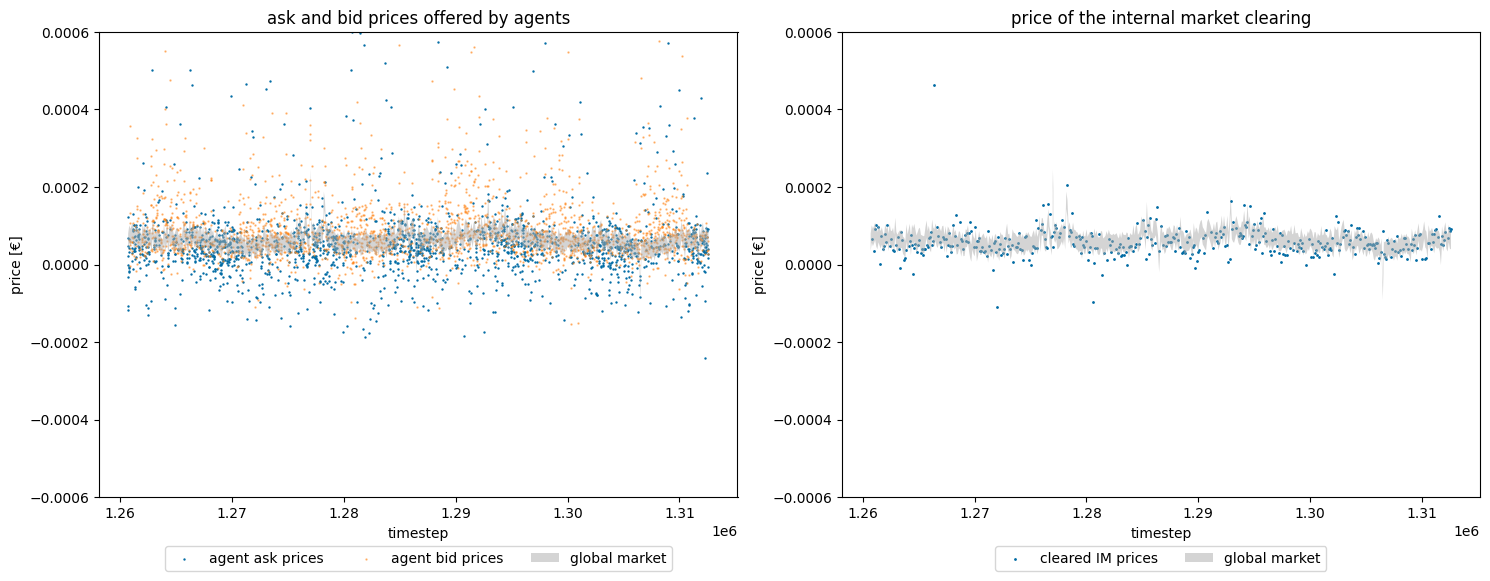

In [84]:
def plot_prices(runs_df:pd.DataFrame,
        plotformat:str,
        experiment:str,
        x_limit:Tuple[int,Optional[int]],
       
        prices_limit:Optional[Tuple[float,float]],
   ):
    
    fig, ax = plt.subplots(1,2,figsize=(15, 6))
    eah.scatter_plot_ask_bids_prices(runs_df,ax = ax[0],sample_min=x_limit[0],sample_max=x_limit[1],y_limit=prices_limit)
    #eah.scatter_plot_agent_prices(runs_df,ax = ax[0],sample_min=x_limit[0],sample_max=x_limit[1],y_limit=prices_limit)
    eah.scatter_plot_cleared_market_prices(runs_df,ax = ax[1],sample_min=x_limit[0],sample_max=x_limit[1],y_limit=prices_limit)

    plt.subplots_adjust(left=0.06, bottom=0.06, right=0.99 , top=0.995, wspace=0.2, hspace=0.3)
    #fig.text(0.95, 0.02, experiment, ha='right', fontsize=7)
    #plt.subplots_adjust(bottom=0.1, wspace=0.2, hspace=0.4) 
    plt.tight_layout()
    if SAVE_PLOTS:
        plt.savefig(os.path.join(PLOT_FOLDER,f"{experiment}_price_scatter.{plotformat}"),format=plotformat,)
        
            
prices_limit = (-0.0006,0.0006)
#prices_limit = None
#x_limit = (1312700-(31*24*1*100),1312700) # one year
x_limit = (1260700,1312700) # one epoch
#x_limit = (0,None)
plot_prices(
        runs_df[::1],
        PLOTFORMAT,
        EXPERIMENT,
        x_limit=x_limit,
        prices_limit=prices_limit,
        )

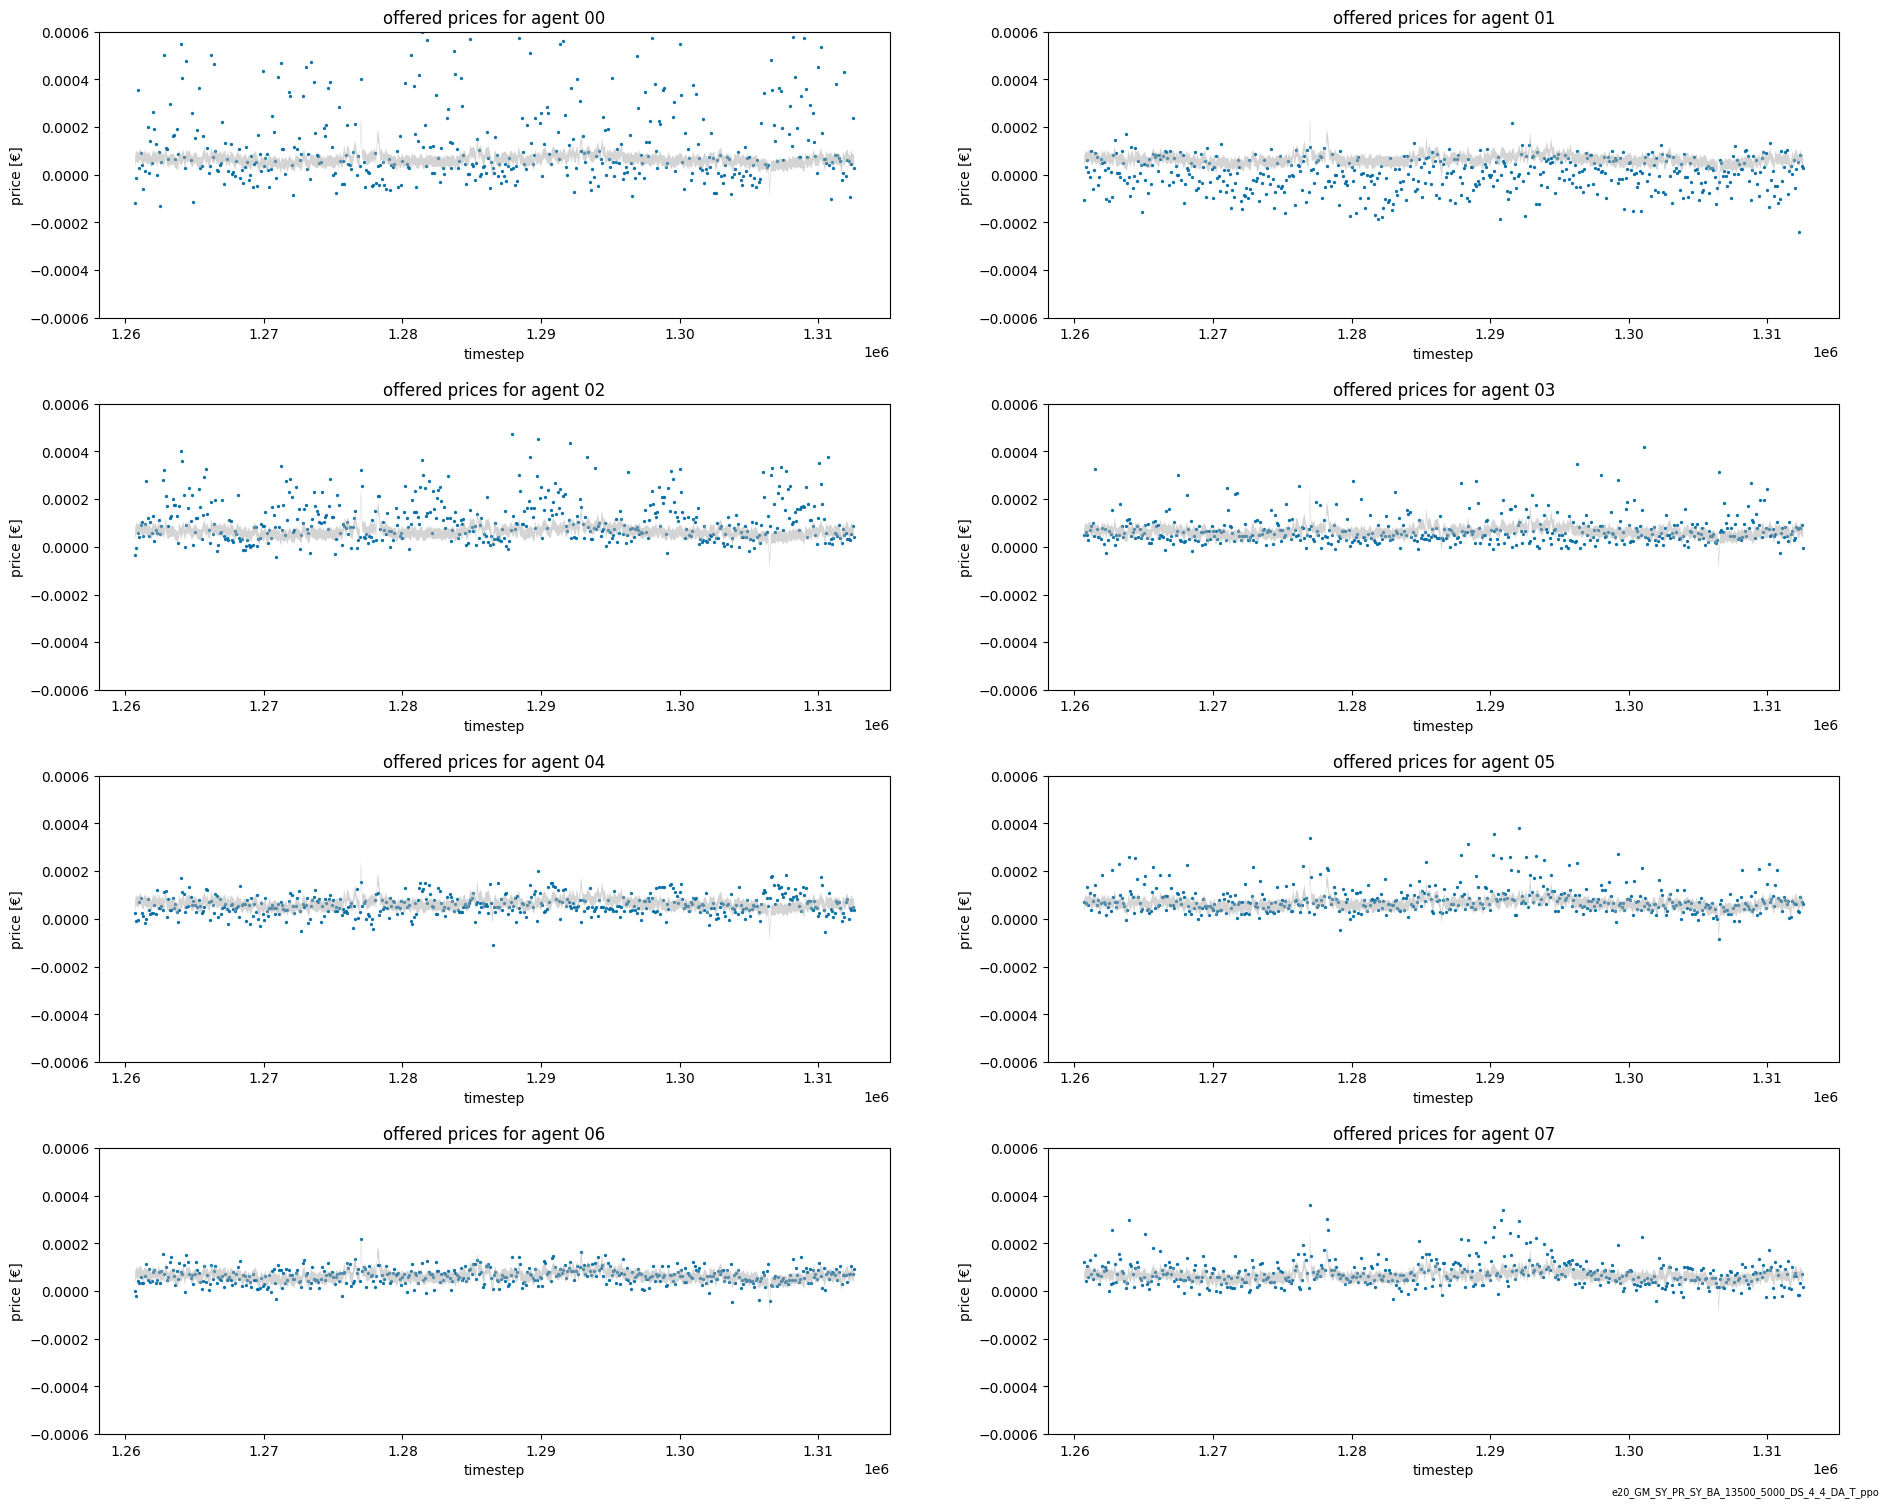

In [85]:
    
def plot_individual_prices(
        runs_df:pd.DataFrame,
        plotformat:str,
        experiment:str,
        x_limit:Tuple[int,Optional[int]],
        prices_limit:Optional[Tuple[float,float]]):
    
    fig, ax = plt.subplots(4,2,figsize=(20, 15))

    eah.plot_offer_price_per_agent(runs_df,ax = ax[0][0],sample_min=x_limit[0],sample_max=x_limit[1],y_limit= prices_limit,agent_index=0)
    eah.plot_offer_price_per_agent(runs_df,ax = ax[0][1],sample_min=x_limit[0],sample_max=x_limit[1],y_limit= prices_limit,agent_index=1)
    eah.plot_offer_price_per_agent(runs_df,ax = ax[1][0],sample_min=x_limit[0],sample_max=x_limit[1],y_limit= prices_limit,agent_index=2)
    eah.plot_offer_price_per_agent(runs_df,ax = ax[1][1],sample_min=x_limit[0],sample_max=x_limit[1],y_limit= prices_limit,agent_index=3)
    eah.plot_offer_price_per_agent(runs_df,ax = ax[2][0],sample_min=x_limit[0],sample_max=x_limit[1],y_limit= prices_limit,agent_index=4)
    eah.plot_offer_price_per_agent(runs_df,ax = ax[2][1],sample_min=x_limit[0],sample_max=x_limit[1],y_limit= prices_limit,agent_index=5)
    eah.plot_offer_price_per_agent(runs_df,ax = ax[3][0],sample_min=x_limit[0],sample_max=x_limit[1],y_limit= prices_limit,agent_index=6)
    eah.plot_offer_price_per_agent(runs_df,ax = ax[3][1],sample_min=x_limit[0],sample_max=x_limit[1],y_limit= prices_limit,agent_index=7)
    
    plt.subplots_adjust(left=0.06, bottom=0.05, right=0.93 , top=0.985, wspace=0.2, hspace=0.3)
    fig.text(0.95, 0.01, experiment, ha='right', fontsize=7)
    
    if SAVE_PLOTS:
        plt.savefig(os.path.join(PLOT_FOLDER,f"{experiment}_agent_prices.{plotformat}"),format=plotformat)


plot_individual_prices(
    runs_df[::1],
        PLOTFORMAT,
        EXPERIMENT,
        x_limit=x_limit,
        prices_limit=prices_limit,
)   

In [86]:
import math
import jax

def _generate_dummy_sine_wave(
        nbr_of_samples:int,
        hourly_phase_offset:int,
        mean_energy_consumption_Wh:float,
        yearly_energy_consumption_Wh_amplitude:float,
        daily_energy_consumption_Wh_amplitude:float,
        noise_amplitude:float,
        seed:float) -> jax.Array:
    """
    Generate a synthetic sine wave representing energy consumption
    with added noise.

    This function creates a series of samples using a combination of cosine and sine 
    functions to model yearly and daily variations. The generated samples are 
    centered around a specified mean value and include random noise to 
    mimic real-world fluctuations.

    Args:
        nbr_of_samples (int): the total number of samples to generate.
        hourly_phase_offset (int): The phase offset in hours to adjust 
                                   the starting point of the samples. 
        mean_energy_consumption_Wh (float): The baseline mean price around which 
                                      the samples oscillate.
        yearly_energy_consumption_Wh_amplitude (float):  amplitude of the yearly variation 
        daily_energy_consumption_Wh_amplitude (float): amplitude of the daily variation 
        noise_amplitude (float): amplitude of the noise added. 
        seed (float): The seed value for the random number generator used to create 
            noise

    Returns:
        jax.Array: An array of generated samples with length equal to nbr_of_samples
    """
    year_divider = 365*24/(2*math.pi)
    day_divider = 24/(2*math.pi)

    year_cos = jax.numpy.cos(
        jax.numpy.arange(hourly_phase_offset,nbr_of_samples+hourly_phase_offset) / year_divider ) * yearly_energy_consumption_Wh_amplitude
    day_sin = jax.numpy.sin(
        jax.numpy.arange(hourly_phase_offset-6,nbr_of_samples+hourly_phase_offset-6) / day_divider) * daily_energy_consumption_Wh_amplitude
    noise = jax.random.uniform(
        jax.random.PRNGKey(seed),(nbr_of_samples,),minval=-noise_amplitude,maxval=noise_amplitude)
    
    return mean_energy_consumption_Wh + year_cos + day_sin + noise

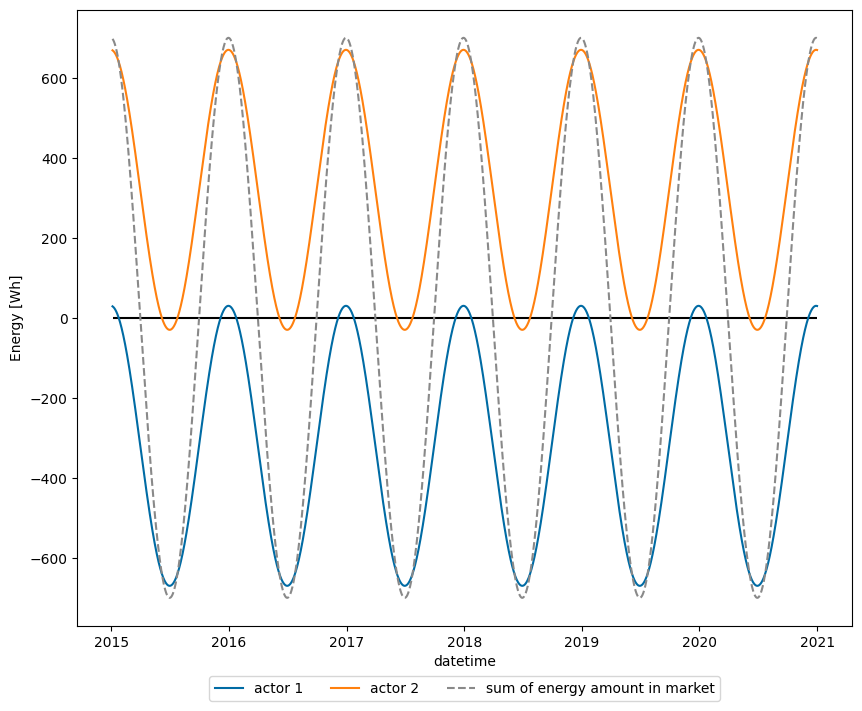

In [103]:
import datetime
import matplotlib.dates as mdates
start_date = "2015-01-05"
nbr_of_samples = 52512
base = datetime.datetime.strptime(start_date, "%Y-%m-%d")
date_list = pd.Series([base + datetime.timedelta(hours=x) for x in range(nbr_of_samples)])  

sine_wave_values = _generate_dummy_sine_wave(
    nbr_of_samples = nbr_of_samples,
    hourly_phase_offset = 5*24,
    mean_energy_consumption_Wh = -320,
    yearly_energy_consumption_Wh_amplitude = 350,
    daily_energy_consumption_Wh_amplitude = 0,
    noise_amplitude =0,
    seed = 0)


sine_wave_values_2 = _generate_dummy_sine_wave(
    nbr_of_samples = nbr_of_samples,
    hourly_phase_offset = 5*24,
    mean_energy_consumption_Wh = 320,
    yearly_energy_consumption_Wh_amplitude = 350,
    daily_energy_consumption_Wh_amplitude = 0,
    noise_amplitude =0,
    seed = 0)


fig, ax = plt.subplots(figsize=(10,8))
ax.hlines(y=0., xmin = date_list.iloc[0], xmax = date_list.iloc[-1], color='black', linestyle='-', )
ax.plot(date_list,sine_wave_values,color= eah.CB_COLORS["dark_blue"], label="actor 1")
ax.plot(date_list,sine_wave_values_2, color=eah.CB_COLORS["dark_orange"], label="actor 2")
ax.plot(date_list,sine_wave_values_2+sine_wave_values, color=eah.CB_COLORS["dark_grey"],linestyle = "--", label="sum of energy amount in market")
locator = mdates.AutoDateLocator(minticks=3, maxticks={"YEARLY":1,"MONTHLY":1,"HOURLY":1})
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel('datetime')
ax.set_ylabel('Energy [Wh]')
ax.legend(loc='upper center', ncols=3, bbox_to_anchor=(0.5, -0.07),)
PLOT_FOLDER_2 = "/workspaces/Thesis_MARL_in_Decentralised_Energy_Networks/code/notebooks/showcase_framework_plots"
filename=os.path.join(PLOT_FOLDER_2,"amount_discrepancy_in_market_when_oscillating_e_demand.pdf")
plt.savefig(filename,format="pdf")

plt.show()

In [ ]:
"e7_GM_siTFF_PR_siFFF_BA_13500_5000_DS_0_0_DA_F",
"e8_GM_siTTF_PR_siFFF_BA_13500_5000_DS_0_0_DA_F",
"e9_GM_siFFF_PR_siTFF_BA_13500_5000_DS_0_0_DA_F",
"e10_GM_SY_PR_SY_BA_13500_5000_DS_0_0_DA_F",

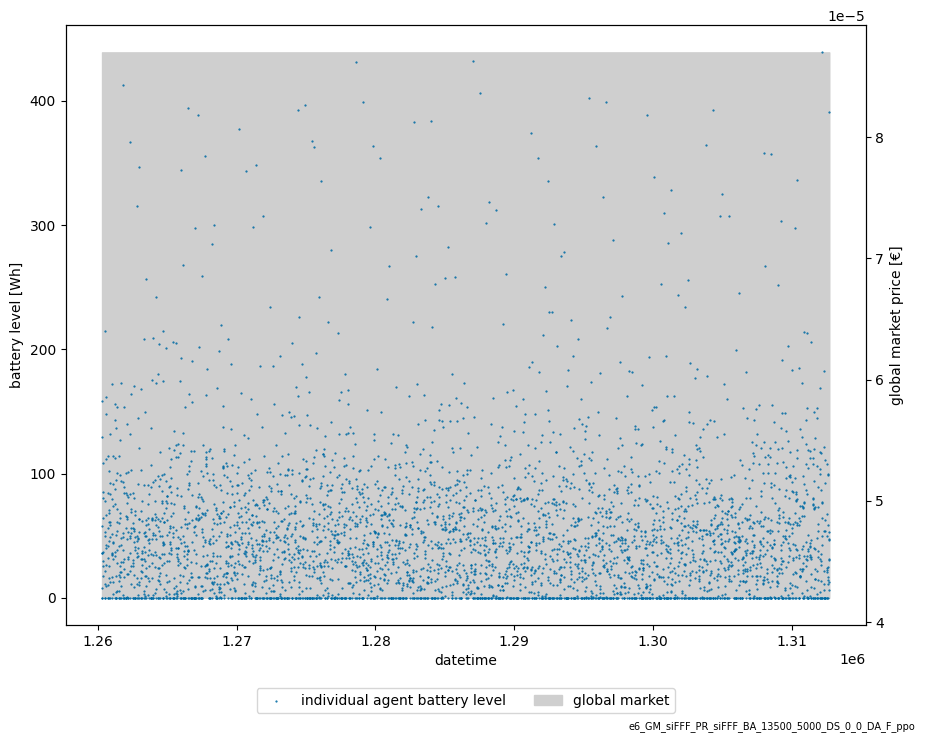

In [26]:
EXPERIMENT = "e6_GM_siFFF_PR_siFFF_BA_13500_5000_DS_0_0_DA_F_ppo"
all_runs_df = eah.load_all_runs(experiment_path=os.path.join(EXPERIMENT_PATH,EXPERIMENT))
runs_df = all_runs_df[0]

temp_df = runs_df[runs_df["epoch"]==24]
samples = temp_df["sample"].unique()
time_of_use_price = temp_df[temp_df["agent_index"]==0]["time_of_use_price"]
feed_in_price = temp_df[temp_df["agent_index"]==0]["feed_in_price"]

fig, ax = plt.subplots(figsize=(10,8))


colorlist = list(eah.CB_COLORS.values())

ax2 = ax.twinx()
gb = ax2.fill_between(samples, time_of_use_price,feed_in_price,color= eah.CB_COLORS["light_grey"], label="global market")
ax2.set_ylabel('global market price [€]')
for i in temp_df["agent_index"].unique():
    battery_level = temp_df[temp_df["agent_index"]==i]["battery_level"]
    
    ax.scatter(samples,battery_level,s=0.3 ,color=eah.CB_COLORS["dark_blue"], label=f"individual agent battery level" if i == 0 else "")
    #if i < 4:
    #    ax.scatter(samples,battery_level,s=0.3 ,color=eah.CB_COLORS["dark_blue"], label=f"agent 00 to 03 battery level" if i == 0 else "")
    #else:
    #    ax.scatter(samples,battery_level,s=0.3 ,color=eah.CB_COLORS["dark_orange"], label=f"agent 04 to 07 battery level" if i == 4 else "")

ax.set_xlabel('datetime')
ax.set_ylabel('battery level [Wh]')


plt.subplots_adjust(left=0.1, bottom=0.15, right=0.9 , top=0.9)
fig.legend(loc='upper center', ncols=3, bbox_to_anchor=(0.5, 0.08),)
fig.text(0.95, 0.02, EXPERIMENT, ha='right', fontsize=7)
filename=os.path.join(PLOT_FOLDER,f"{EXPERIMENT}_battery_level.pdf")
#ax.set_ylim(0,14000)
ax.set_zorder(ax2.get_zorder()+1) # put ax in front of ax2
ax.patch.set_visible(False) # hide the 'canvas'
plt.savefig(filename,format="pdf")

plt.show()

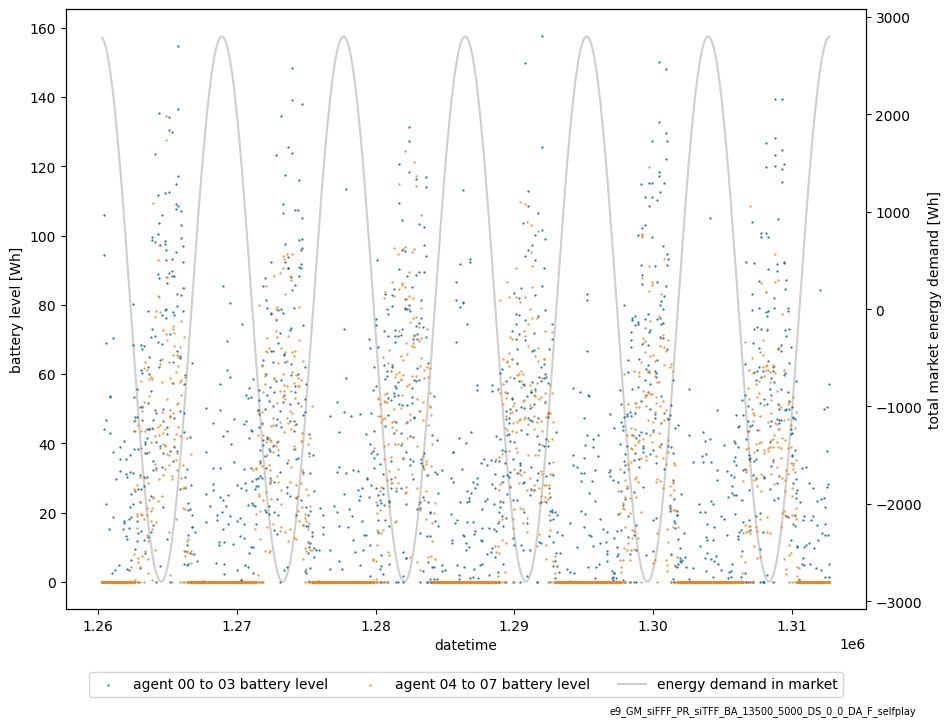

In [25]:
EXPERIMENT = "e9_GM_siFFF_PR_siTFF_BA_13500_5000_DS_0_0_DA_F_selfplay"
all_runs_df = eah.load_all_runs(experiment_path=os.path.join(EXPERIMENT_PATH,EXPERIMENT))
runs_df = all_runs_df[0]

temp_df = runs_df[runs_df["epoch"]==24]
samples = temp_df["sample"].unique()
time_of_use_price = temp_df[temp_df["agent_index"]==0]["time_of_use_price"]
feed_in_price = temp_df[temp_df["agent_index"]==0]["feed_in_price"]

fig, ax = plt.subplots(figsize=(10,8))

energy_demand = temp_df.groupby(["sample"])["energy_demand"].sum().reset_index()
colorlist = list(eah.CB_COLORS.values())

ax2 = ax.twinx()
gb = ax2.plot(samples, energy_demand["energy_demand"],color= eah.CB_COLORS["light_grey"], label="energy demand in market")
ax2.set_ylabel('total market energy demand [Wh]')
for i in temp_df["agent_index"].unique():
    battery_level = temp_df[temp_df["agent_index"]==i]["battery_level"]
    if i < 4:
        ax.scatter(samples,battery_level,s=0.3 ,color=eah.CB_COLORS["dark_blue"], label=f"agent 00 to 03 battery level" if i == 0 else "")
    else:
        ax.scatter(samples,battery_level,s=0.3 ,color=eah.CB_COLORS["dark_orange"], label=f"agent 04 to 07 battery level" if i == 4 else "")

    
ax.set_xlabel('datetime')
ax.set_ylabel('battery level [Wh]')


plt.subplots_adjust(left=0.1, bottom=0.15, right=0.9 , top=0.9)
fig.legend(loc='upper center', ncols=3, bbox_to_anchor=(0.5, 0.08),)
fig.text(0.95, 0.02, EXPERIMENT, ha='right', fontsize=7)
filename=os.path.join(PLOT_FOLDER,f"{EXPERIMENT}_battery_level.pdf")

ax.set_zorder(ax2.get_zorder()+1) # put ax in front of ax2
ax.patch.set_visible(False) # hide the 'canvas'
plt.savefig(filename,format="pdf")

plt.show()